In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input/diabetics2.csv"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from  sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("../input/diabetes2.csv")


# Any results you write to the current directory are saved as output.

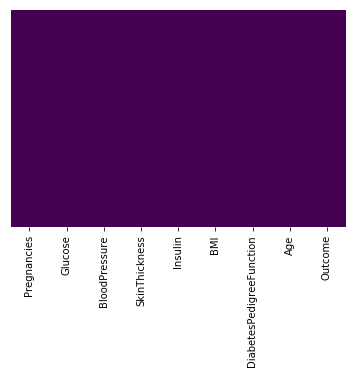

In [2]:
#checking for null values 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

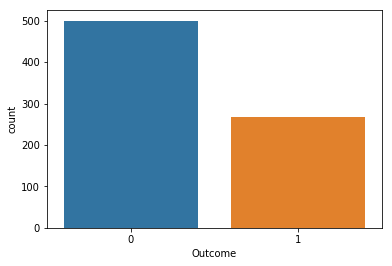

In [3]:
#number of 1s and 0s
sns.countplot(x='Outcome',data=df)
plt.show()

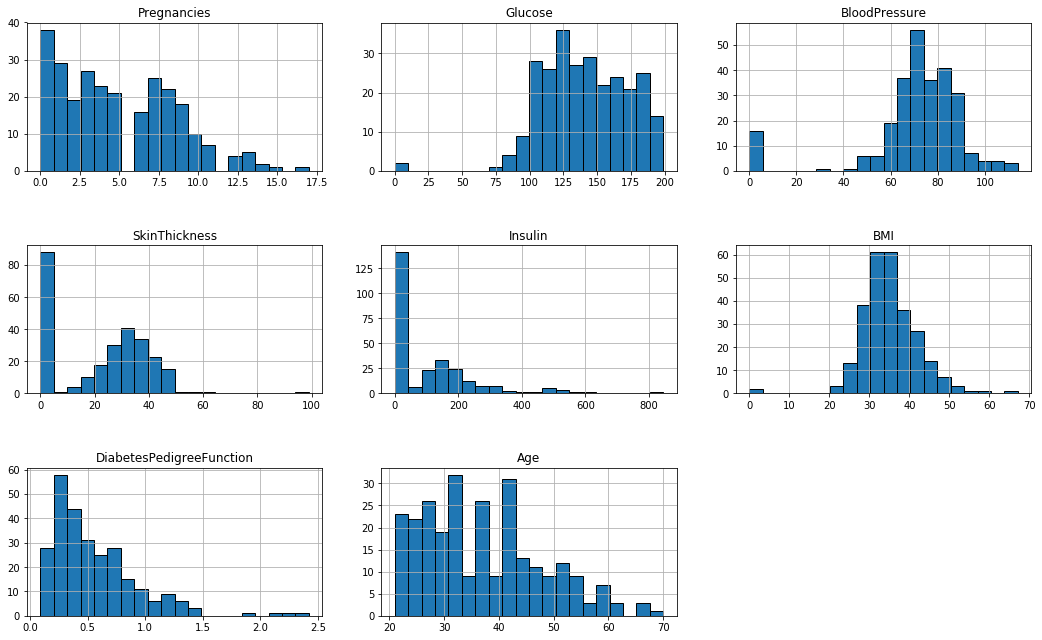

In [4]:
#plotting based on different category for people with diabetics
df1=df[df['Outcome']==1]
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

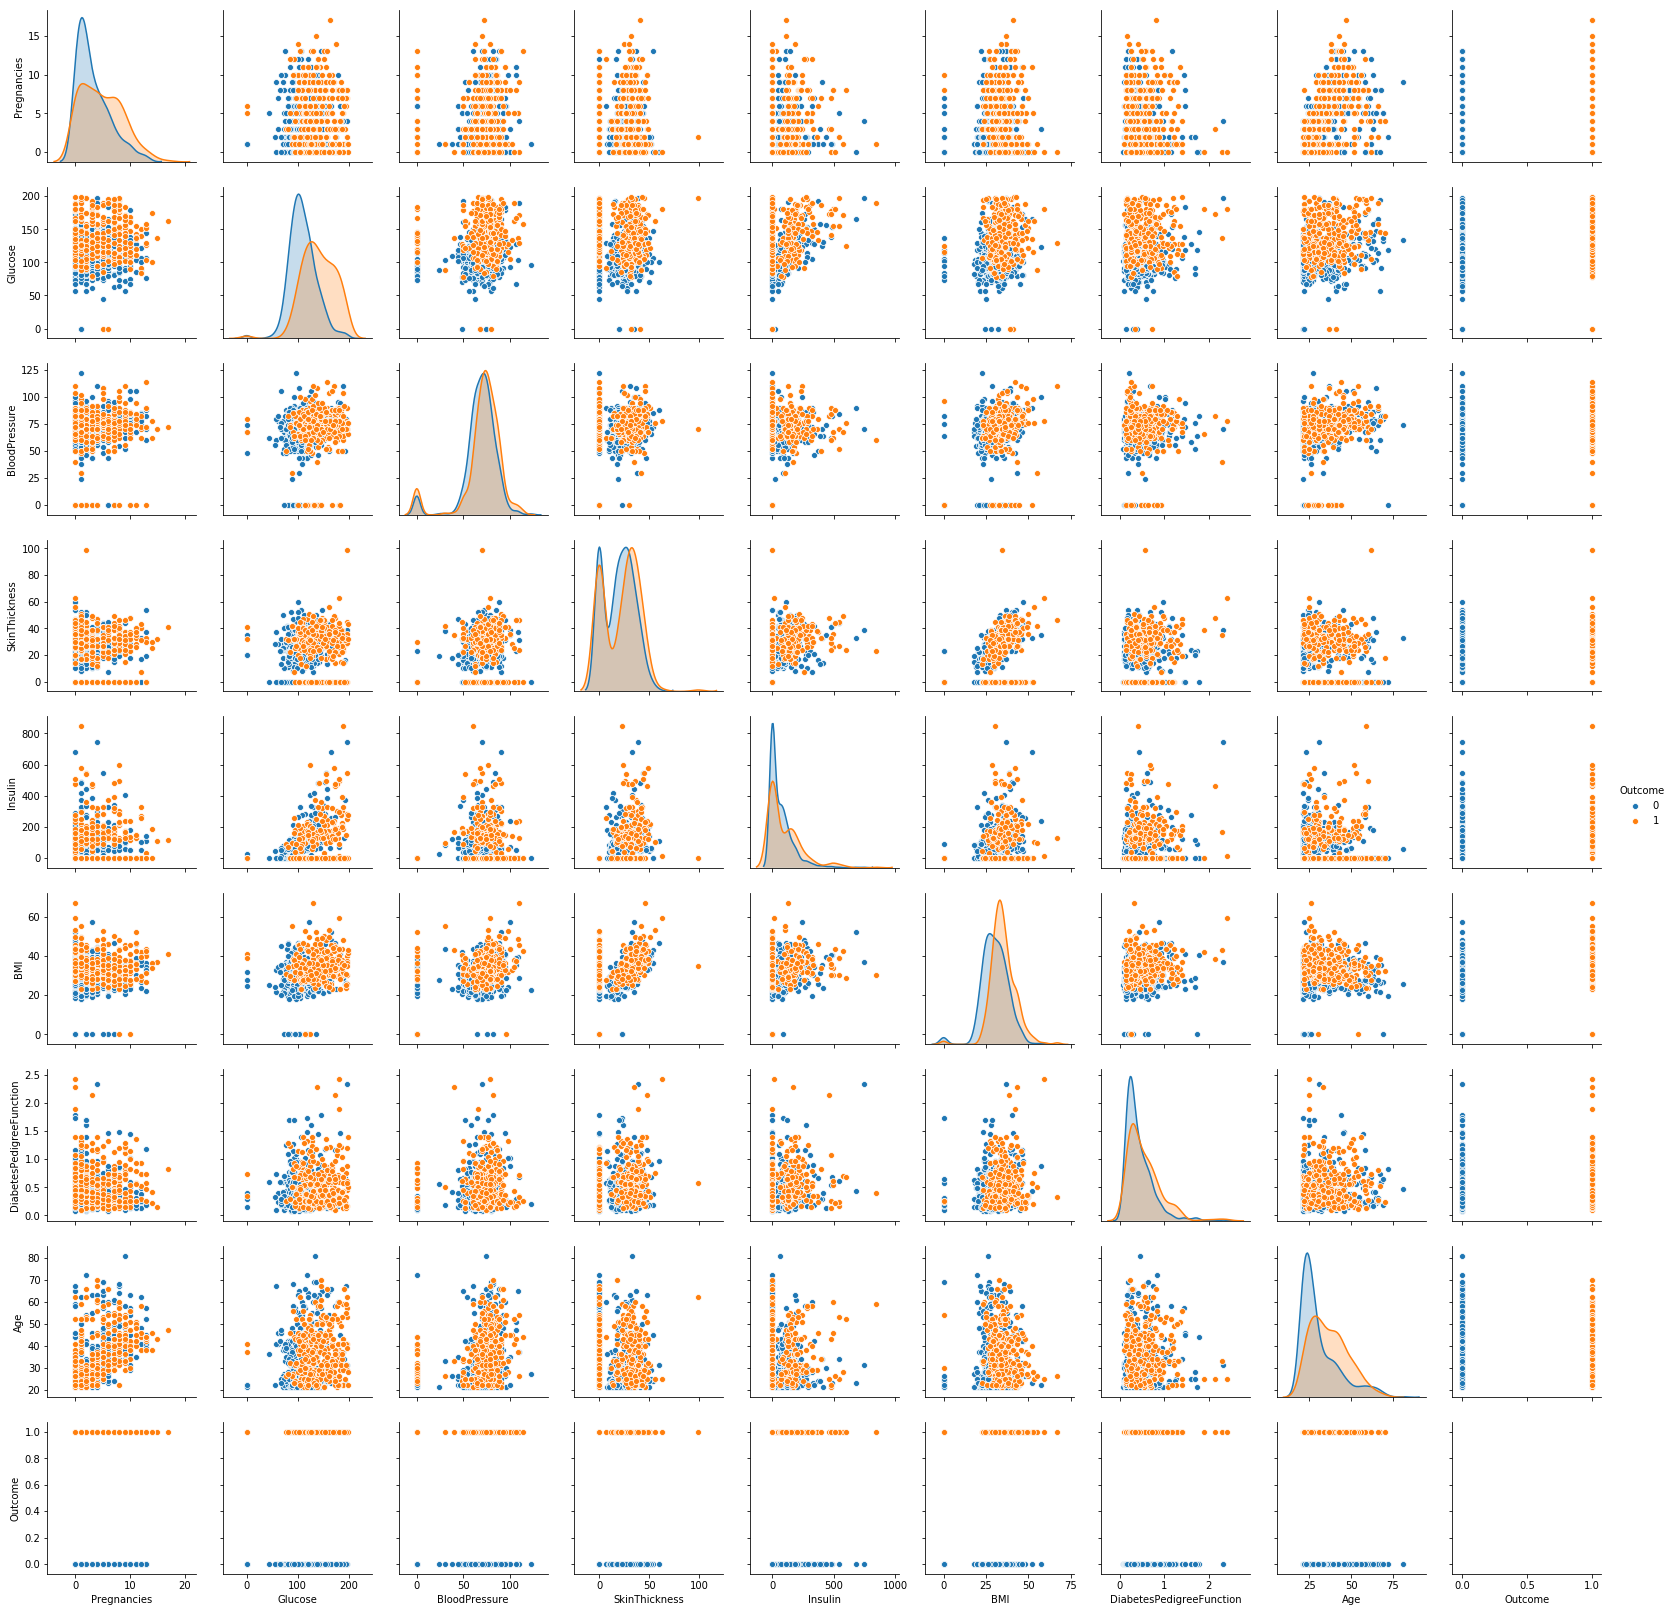

In [5]:
#pairplot between all possible combinations of categories
sns.pairplot(data=df,hue='Outcome',diag_kind='kde')
plt.show()

In [6]:
#stratifing the data of Outcome.
outcome=df['Outcome']
data=df[df.columns[:8]]
train,test=train_test_split(df,test_size=0.25,random_state=0,stratify=df['Outcome'])
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [7]:
#1.linear support vector machines(SVC)
model=svm.SVC(kernel='rbf')
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('Accuracy for SVM kernel rbf is', metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel rbf is 0.6510416666666666


In [8]:
model=svm.SVC(kernel='linear')
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('Accuracy for SVM kernel linear is', metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel linear is 0.7708333333333334


In [9]:
#logistic regression
model=LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('Accuracy for SVM kernel logistic regression is', metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel logistic regression is 0.7760416666666666


In [10]:
#decision tree classifer
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('Accuracy for SVM kernel decision tree classifier is', metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel decision tree classifier is 0.7604166666666666


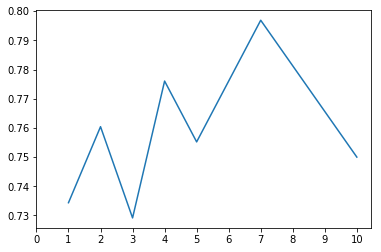

In [11]:
#knn
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list (range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index,a)
plt.xticks(x)
plt.show()

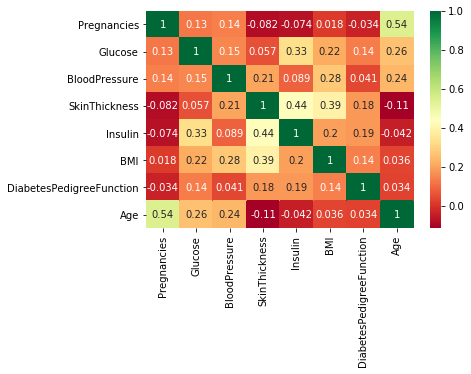

In [12]:
#feature engineering
sns.heatmap(df[df.columns[:8]].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [13]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=0)
x=df[df.columns[:8]]
y=df['Outcome']
model.fit(x,y)
print(pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False))

Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64
